## **Data Visualization I**

1. **Use the inbuilt dataset `Titanic`**.  
   The dataset contains **891 rows** and provides information about the **passengers who boarded the Titanic**.  

   Use the **Seaborn library** to explore the data and see if we can identify **any patterns or trends**.

2. **Visualize the distribution of ticket prices**:  
   Write the code to check how the **prices of the tickets** (column: `'fare'`) for each passenger are distributed by **plotting a histogram**.


The objective is to **predict the value of the ticket prices** using the given features.


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# tells abut the missing values in each column 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# fills the missing values in the age with their mean
df["Age"] = df["Age"].fillna(df["Age"].mean())
#fills the missing values in the deck with the forward fill , takes the last not null values
df["Cabin"] = df["Cabin"].ffill()
# Drops all rows in the DataFrame that still have any missing values left after the previous operations.
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

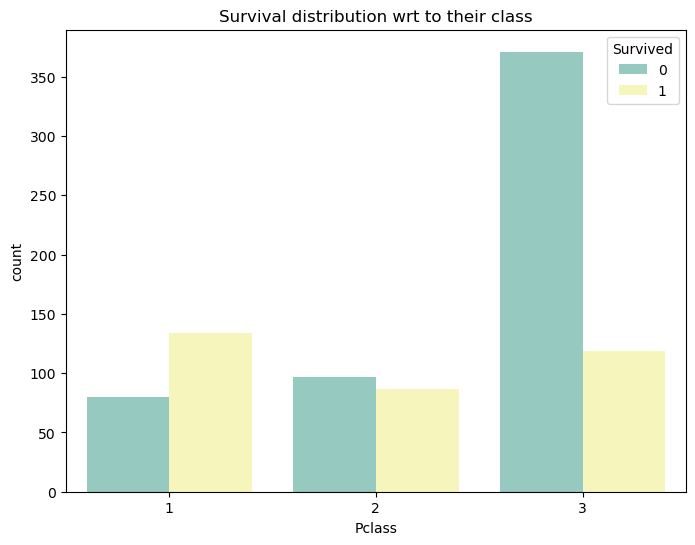

In [27]:
# sns.countplot(data=df, x="class", hue="survived")
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set3')
plt.title('Survival distribution wrt to their class')
plt.show()


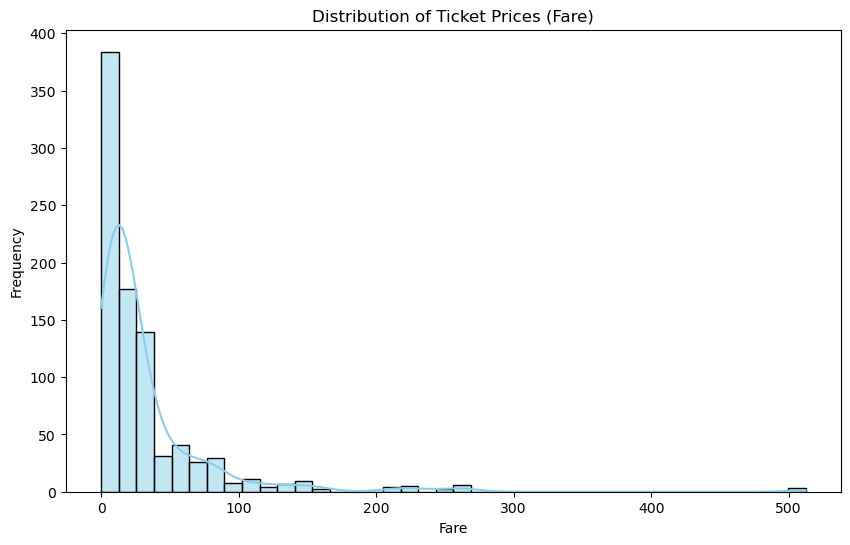

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Ticket Prices (Fare)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

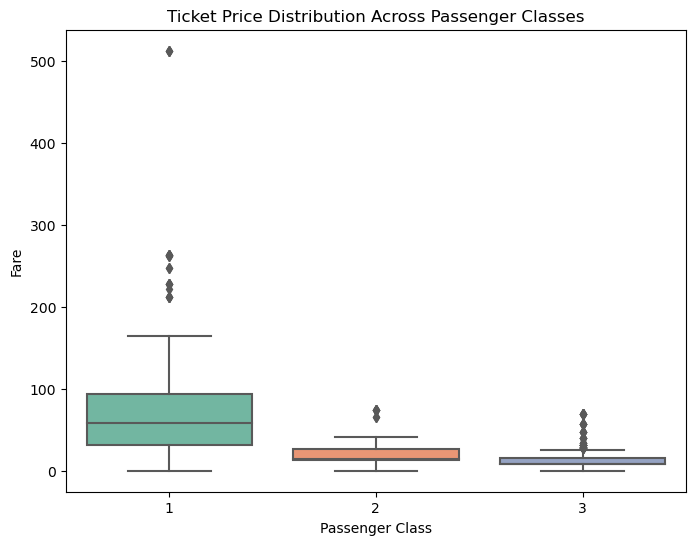

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Ticket Price Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


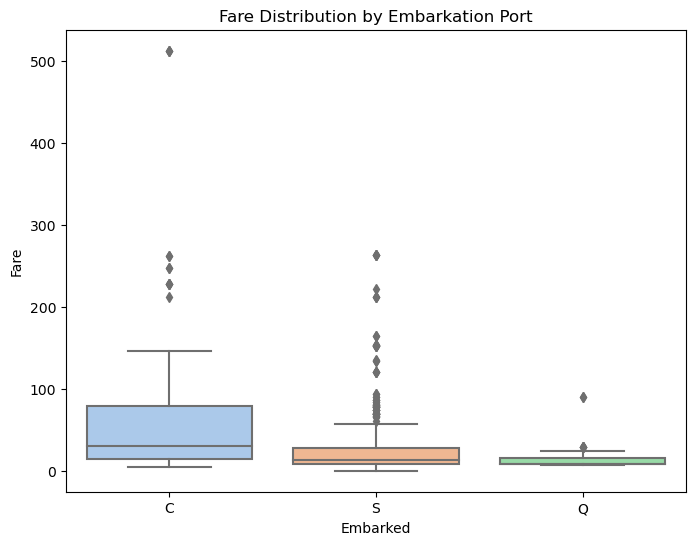

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Embarked', y='Fare', data=df, palette='pastel')
plt.title('Fare Distribution by Embarkation Port')
plt.show()

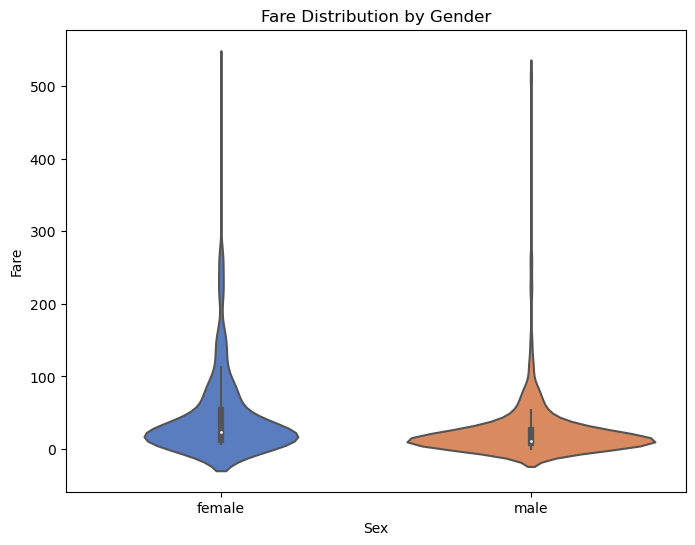

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Fare', data=df, palette='muted')
plt.title('Fare Distribution by Gender')
plt.show()


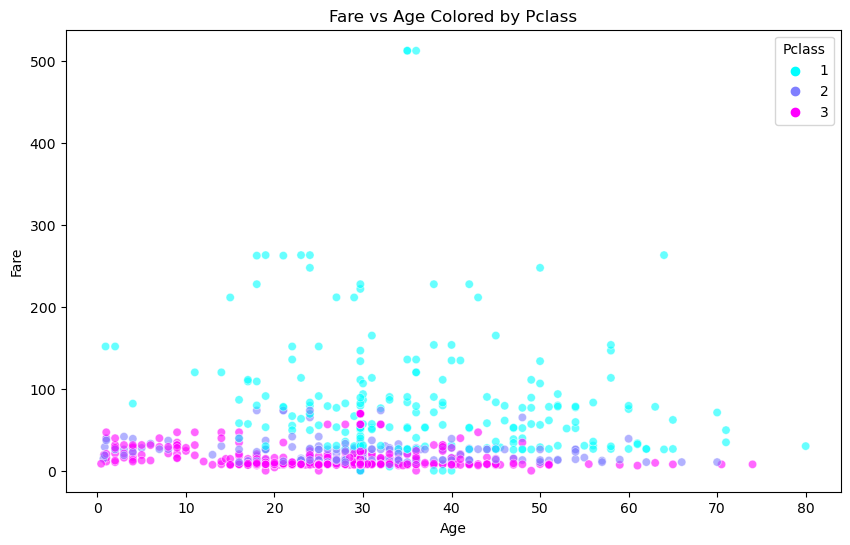

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Pclass', palette='cool', alpha=0.6)
plt.title('Fare vs Age Colored by Pclass')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


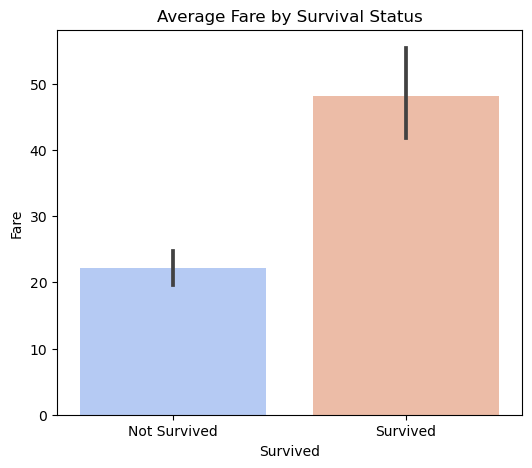

In [19]:
plt.figure(figsize=(6, 5))
sns.barplot(x='Survived', y='Fare', data=df, palette='coolwarm')
plt.title('Average Fare by Survival Status')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

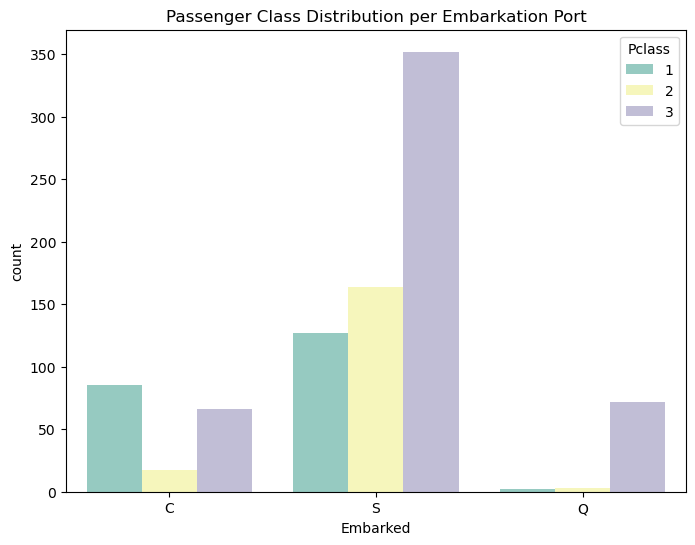

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Pclass', data=df, palette='Set3')
plt.title('Passenger Class Distribution per Embarkation Port')
plt.show()

